In [4]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay,f1_score
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model
import os


In [5]:
from numpy.random import seed
seed(1)

from tensorflow import random,config
random.set_seed(1)
config.experimental.enable_op_determinism()

import random
random.seed(2)

In [6]:
#read the dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [7]:
print(f"The training data shape:{x_train.shape}, its label shape:{y_train.shape}")
print(f"The test data shape:{x_test.shape}, its label shape:{y_test.shape}")

The training data shape:(60000, 28, 28), its label shape:(60000,)
The test data shape:(10000, 28, 28), its label shape:(10000,)


In [8]:
print("Minimum Pixel Value:",np.min(x_train[0]))
print("Maximum Pixel Value:",np.max(x_train[0]))

Minimum Pixel Value: 0
Maximum Pixel Value: 255


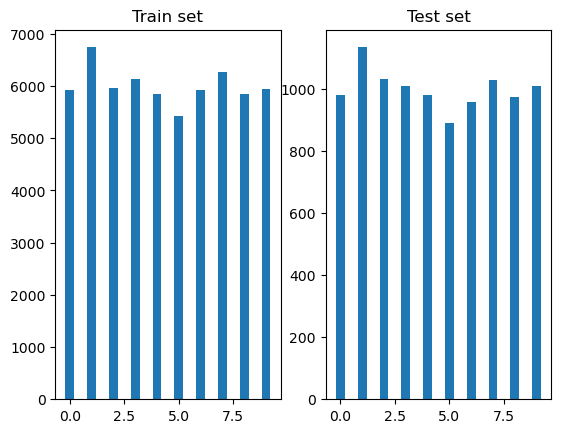

In [9]:
#check if there is any imbalance
plt.subplot(1,2,1)
unique,counts=np.unique(y_train,return_counts=True)
plt.bar(unique,counts,width=0.4)
plt.title("Train set")
plt.subplot(1,2,2)
unique,counts=np.unique(y_test,return_counts=True)
plt.bar(unique,counts,width=0.4)
plt.title("Test set")
plt.show()

In [10]:
#Normalize the pixel values
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [11]:
#One hot encoding
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [12]:
#Expand the input dimenesnion to have one channel for CNN input
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)


In [13]:
#Check the dimensions of the input and output
print(f"The training data shape:{x_train.shape}, its label shape:{y_train.shape}")
print(f"The test data shape:{x_test.shape}, its label shape:{y_test.shape}")

The training data shape:(60000, 28, 28, 1), its label shape:(60000, 10)
The test data shape:(10000, 28, 28, 1), its label shape:(10000, 10)


In [14]:
#Split the dataset into train and test sets
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [15]:
#Create the model
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [16]:
#Model parameters
loss='categorical_crossentropy'
metric='accuracy'
epochs=15
model.compile(loss=loss,optimizer='adam',metrics=[metric])

In [17]:
#Model Training
history=model.fit(x_train,y_train,epochs=epochs,batch_size=128,verbose=1,validation_data=(x_val,y_val))

Epoch 1/15
329/329 [==============================] - 14s 8ms/step - loss: 0.4182 - accuracy: 0.8769 - val_loss: 0.1154 - val_accuracy: 0.9681
Epoch 2/15
329/329 [==============================] - 2s 7ms/step - loss: 0.1211 - accuracy: 0.9635 - val_loss: 0.0756 - val_accuracy: 0.9784
Epoch 3/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0917 - accuracy: 0.9718 - val_loss: 0.0663 - val_accuracy: 0.9813
Epoch 4/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0757 - accuracy: 0.9764 - val_loss: 0.0604 - val_accuracy: 0.9830
Epoch 5/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0660 - accuracy: 0.9792 - val_loss: 0.0533 - val_accuracy: 0.9846
Epoch 6/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0613 - accuracy: 0.9814 - val_loss: 0.0479 - val_accuracy: 0.9861
Epoch 7/15
329/329 [==============================] - 2s 7ms/step - loss: 0.0558 - accuracy: 0.9822 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch

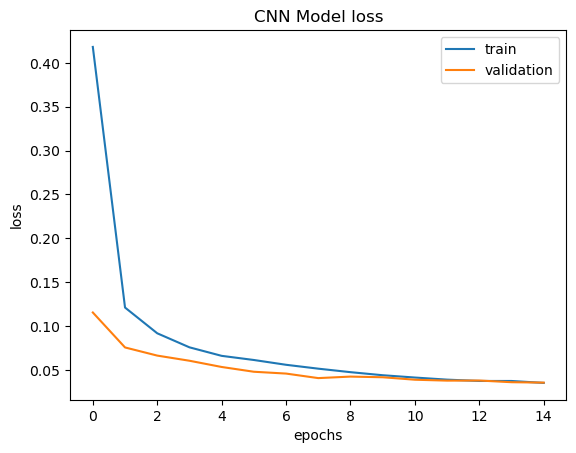

In [18]:
#Plot model train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()


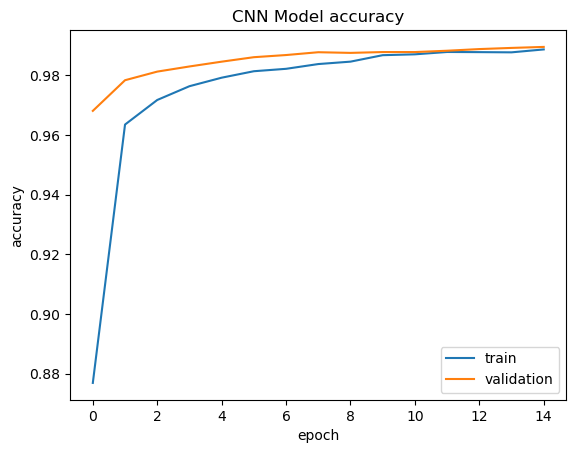

In [19]:
#Display Metric
plt.plot(history.history[metric])
plt.plot(history.history[f'val_{metric}'])
plt.title(f'CNN Model {metric}')
plt.ylabel(metric)
plt.xlabel('epoch')
plt.legend(['train','validation'])
plt.show()

In [20]:
#Model Evaluation
test_results=model.evaluate(x_test,y_test,verbose=1)
print(f"Test set: - loss : {test_results[0]} - {metric}: {test_results[1]}")

  1/313 [..............................] - ETA: 20s - loss: 0.0011 - accuracy: 1.0000

313/313 [==============================] - 1s 3ms/step - loss: 0.0253 - accuracy: 0.9915
Test set: - loss : 0.025349874049425125 - accuracy: 0.9915000200271606


In [21]:
#Classification Evaluation
pred_train=np.argmax(model.predict(x_train),axis=1)
pred_val=np.argmax(model.predict(x_val),axis=1)
pred_test=np.argmax(model.predict(x_test),axis=1)
yy_train=np.argmax(y_train,axis=1)
yy_val=np.argmax(y_val,axis=1)
yy_test=np.argmax(y_test,axis=1)

313/313 [==============================] - 1s 2ms/step


In [22]:
#Display other metrics
print("Displaying other metrics:")
print("\t\tAccuracy (%)\tPrecision (%)\tRecall (%)\tF-measure (%)")
print(
    f"Train:\t\t{round(accuracy_score(yy_train,pred_train,normalize=True)*100,2)}\t\t"
    f"{round(precision_score(yy_train,pred_train,average='macro')*100,2)}\t\t"
    f"{round(recall_score(yy_train,pred_train,average='macro')*100,2)}\t\t"
    f"{round(f1_score(yy_train,pred_train,average='macro')*100,2)}\t\t")
    
print(    
    f"Val:\t\t{round(accuracy_score(yy_val,pred_val,normalize=True)*100,2)}\t\t"
    f"{round(precision_score(yy_val,pred_val,average='macro')*100,2)}\t\t"
    f"{round(recall_score(yy_val,pred_val,average='macro')*100,2)}\t\t"
    f"{round(f1_score(yy_val,pred_val,average='macro')*100,2)}\t\t"
)

print(    
    f"Test:\t\t{round(accuracy_score(yy_test,pred_test,normalize=True)*100,2)}\t\t"
    f"{round(precision_score(yy_test,pred_test,average='macro')*100,2)}\t\t"
    f"{round(recall_score(yy_test,pred_test,average='macro')*100,2)}\t\t"
    f"{round(f1_score(yy_test,pred_test,average='macro')*100,2)}\t\t"
)

Displaying other metrics:
		Accuracy (%)	Precision (%)	Recall (%)	F-measure (%)
Train:		99.55		99.56		99.55		99.56		
Val:		98.96		98.95		98.95		98.95		
Test:		99.15		99.15		99.15		99.15		


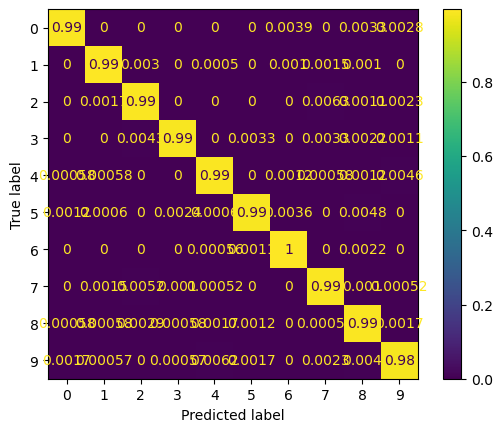

In [23]:
#Confusion Matrix
ConfusionMatrixDisplay.from_predictions(yy_val,pred_val,normalize='true')
plt.show()

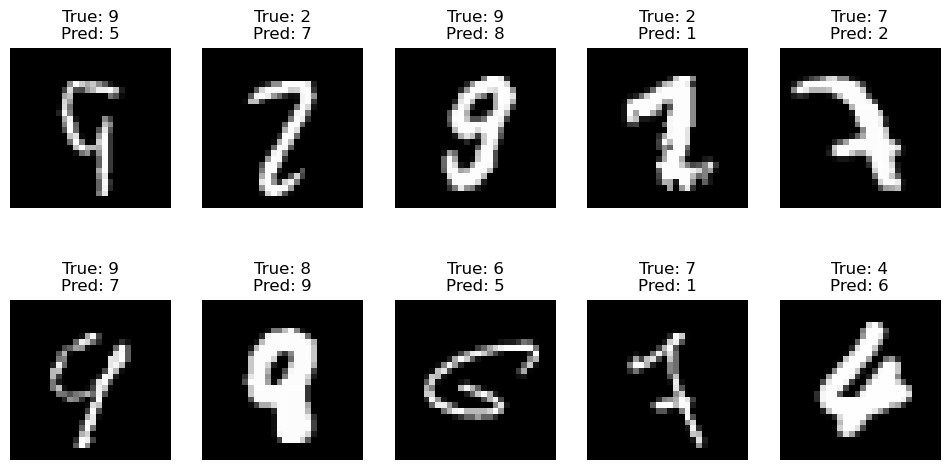

In [24]:
#Select missclassifications
miss_class=np.where(yy_test!=pred_test)[0]

#display 5 worst classifications
fig,axs=plt.subplots(2,5,figsize=(12,6))
axs=axs.flat
for i in range(10):
    if i in range(10):
        if i<len(miss_class):
            axs[i].imshow(x_test[miss_class[i]],cmap='gray')
            axs[i].set_title("True: {}\nPred: {}".format(yy_test[miss_class[i]],
                                                         pred_test[miss_class[i]]))
            axs[i].axis('off')

plt.show()

In [26]:
model.save('final_model.h5')

In [32]:
def load_image(filename):
    #load the image
    img=load_img(filename,color_mode = "grayscale",target_size=(28,28))
    #convert to array
    img=img_to_array(img)
    #reshape into single sample with 1 channel
    img=img.reshape(1,28,28,1)
    #prepare pixel data
    img=img.astype('float32')
    img=img/255.0
    return img

In [33]:
#load image and predict class
def run_example():
    #load the image
    img=load_image('images.jpg')
    #load model
    model=load_model('final_model.h5')
    #predict the class
    predict_value=model.predict(img)
    digit=np.argmax(predict_value)
    print("Predicted Digit:{}".format(digit))

In [34]:
run_example()

1/1 [==============================] - 0s 61ms/step
Predicted Digit:2
